In [ ]:
Требуется исследовать, зависит ли факт провала клиента в просрочку от набора признаков. Постройте дерево решений и сделайте вывод о взаимосвязях. Факт провала в просрочку (таргет-величина) представлена колонкой flag_coll (1 - провалился в просрочку, 0 - не провалился в просрочку)

**Описание признаков:**

- amt_credit - Размер выданного кредита
- bki - Размер внешнего долга по Бюро Кредитный Историй
- age - возраст клиента (полных лет)
- is_educ - флаг, показывающий, есть ли у клиента высшее образование
- cl_segm - клиентский сегмент (качество клиента, от 1 до 4)
- credit_type - кредитный продукт
    - CC - Credit Card (Кредитная карта)
    - POS - потребительский кредит
- fssp - размер долга, переданный в Федеральную Службу Судебных Приставов
- cnt_closed_contract - кол-во уже закрытых клиентом контрактов в нашем банке
- is_cellphone - флаг, показывающий, есть ли у клиента подтвержденный номер мобильного телефона

In [50]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
banks = pd.read_csv('Датасет банки.csv', sep = ';')
banks.head()

,id_client,flag_coll,amt_credit,bki,age,is_educ,cl_segm,credit_type,fssp,cnt_closed_contract,is_cellphone
0,1000001,1.0,225000.0,26395.0,68.0,0.0,2.0,CC,0.0,0.0,0.0
1,1000002,0.0,75000.0,89146.0,69.0,1.0,2.0,POS,0.0,1.0,1.0
2,1000003,0.0,10000.0,35635.0,56.0,1.0,3.0,CC,0.0,0.0,1.0
3,1000004,0.0,400000.0,60715.0,36.0,1.0,2.0,POS,0.0,0.0,0.0
4,1000005,1.0,175000.0,38110.0,48.0,0.0,2.0,POS,0.0,1.0,1.0


In [52]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_client            9568 non-null   int64  
 1   flag_coll            9406 non-null   float64
 2   amt_credit           9361 non-null   float64
 3   bki                  9361 non-null   float64
 4   age                  9361 non-null   float64
 5   is_educ              9361 non-null   float64
 6   cl_segm              9361 non-null   float64
 7   credit_type          9361 non-null   object 
 8   fssp                 9361 non-null   float64
 9   cnt_closed_contract  9361 non-null   float64
 10  is_cellphone         9361 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 822.4+ KB


In [53]:
banks['flag_coll'].unique()
# проверяем уникальные значение в столбце

array([ 1.,  0., -1., -2., nan])

In [54]:
banks['flag_coll'].isna().value_counts(normalize=True)*100

# где True там значения пропущены, и получили значение пропущенных в процентах

False    98.306856
True      1.693144
Name: flag_coll, dtype: float64

In [55]:
banks = banks[banks['flag_coll'] >= 0].dropna()
# так можно осчитить от тех что нам не нужны, удалить лишние значения. Через условие перед dropna

In [79]:
# разделим DF на две таблицыц через обозначение разных переменных (перперывных и остальных)

discr_feature = ['is_educ', 'cl_segm', 'credit_type', 'cnt_closed_contract', 'is_cellphone']
num_feature = ['amt_credit', 'bki', 'age', 'fssp']

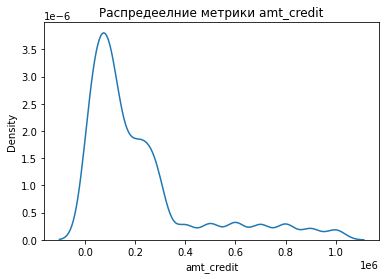

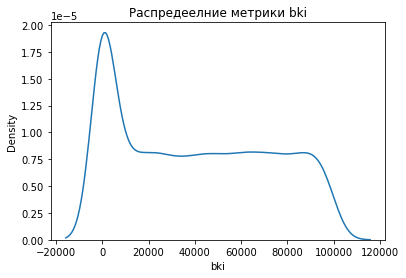

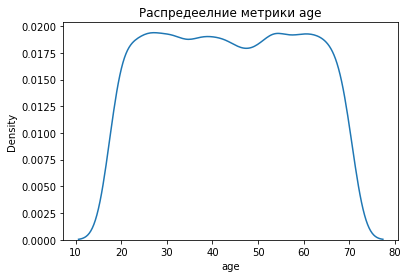

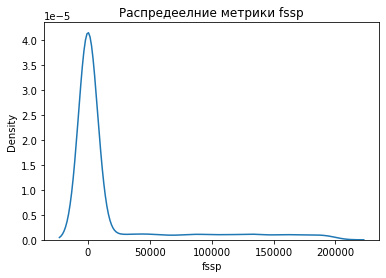

In [80]:
# цикл для построения графика
for col in num_feature:
    sns.kdeplot(banks[col])
    plt.title(f'Распредеелние метрики {col}')
    plt.show()

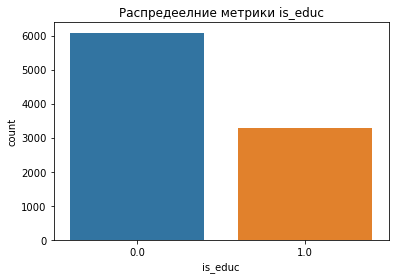

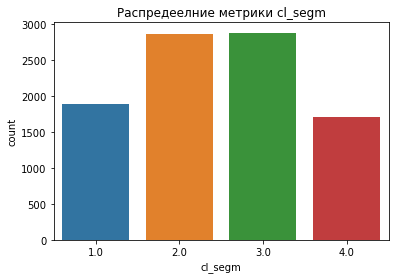

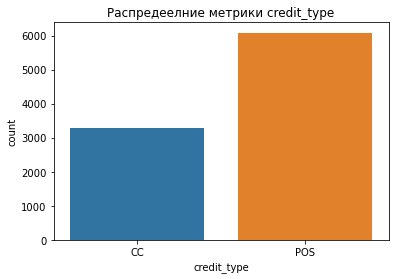

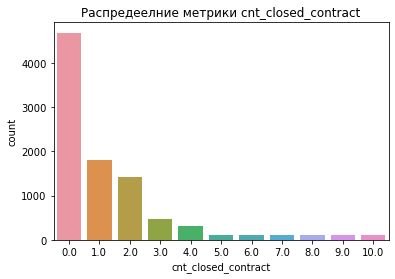

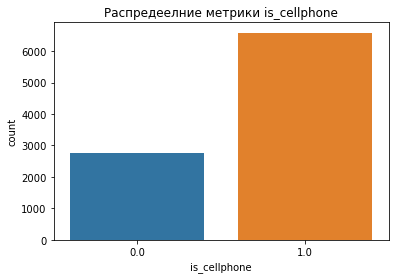

In [81]:
# цикл для построения графика дискретных признаков
for col in discr_feature:
    sns.countplot(x = banks[col])
    plt.title(f'Распредеелние метрики {col}')
    plt.show()

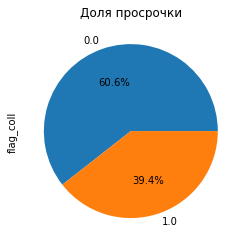

In [82]:
plt.title('Доля просрочки')
(banks['flag_coll'].value_counts(normalize=True)*100).plot(kind='pie', autopct='%1.1f%%')
plt.show()
#визуализация пейчара. Круглой диаграмы


In [83]:
# интервальная оценка. Создаем интеревал и определяем среднее для этого интервала
#
banks.groupby(pd.cut(banks['amt_credit'], bins = 10)).agg(flag_1 = ('flag_coll', 'mean'))

,flag_1
amt_credit,
"(9010.0, 109000.0]",0.394598
"(109000.0, 208000.0]",0.377309
"(208000.0, 307000.0]",0.382336
"(307000.0, 406000.0]",0.414097
"(406000.0, 505000.0]",0.404000
"(505000.0, 604000.0]",0.373134
"(604000.0, 703000.0]",0.444915
"(703000.0, 802000.0]",0.424490
"(802000.0, 901000.0]",0.408046


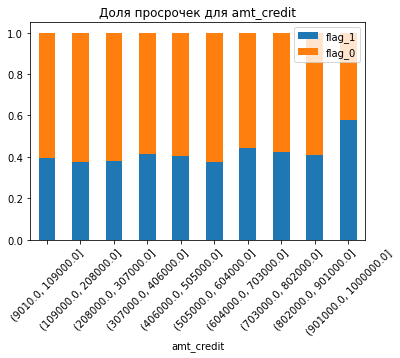

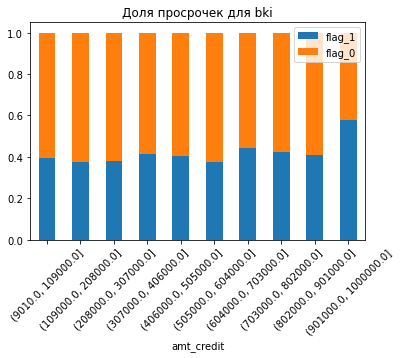

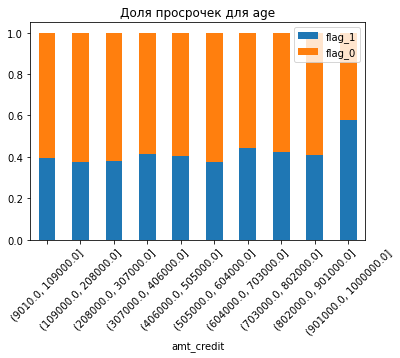

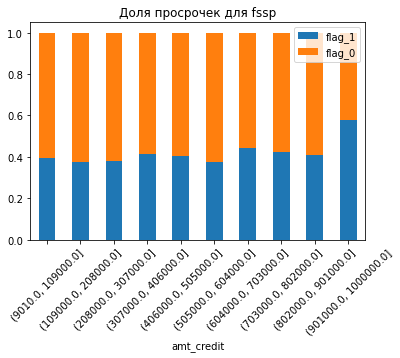

In [84]:
# создания цикла для визуализация интервальной оценки через бары. Так мы видим динамику относительно 100%
for col in num_feature:
    df_target = banks.groupby(pd.cut(banks['amt_credit'], bins = 10)).agg(flag_1 = ('flag_coll', 'mean'))
    df_target['flag_0'] = 1 - df_target['flag_1']
    df_target.plot(kind='bar', title = f'Доля просрочек для {col}', stacked = True)
    plt.xticks(rotation=45)
    plt.show()

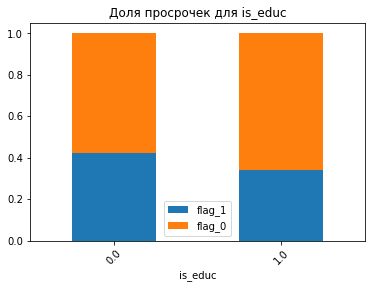

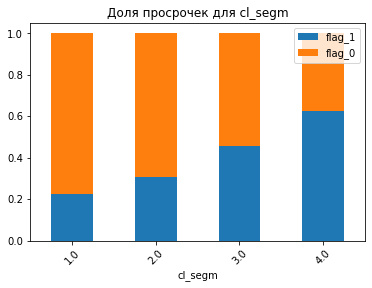

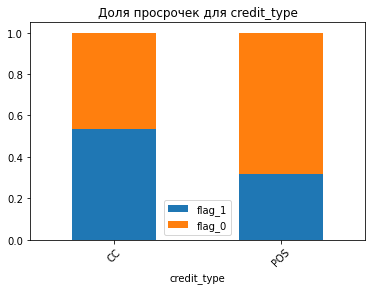

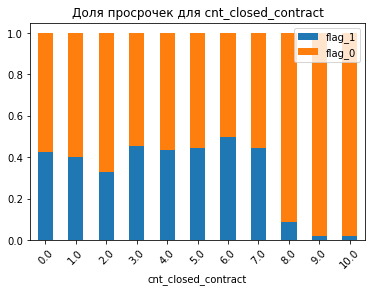

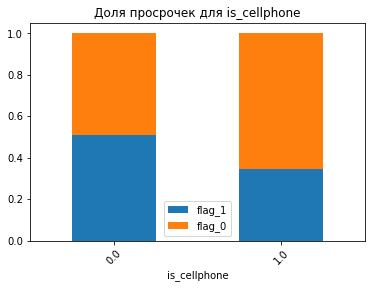

In [85]:
# создания цикла для визуализация интервальной оценки через бары. Так мы видим динамику относительно 100%
for col in discr_feature:
    df_target = banks.groupby(col).agg(flag_1 = ('flag_coll', 'mean'))
    df_target['flag_0'] = 1 - df_target['flag_1']
    df_target.plot(kind='bar', title = f'Доля просрочек для {col}', stacked = True)
    plt.xticks(rotation=45)
    plt.show()

In [86]:
banks['credit_type'] = np.where(banks['credit_type'] == 'CC', 1, 0)
# заменяем одно значение на другое, если СС то 1, в противном случае 0

In [87]:
banks['credit_type']

0       1
1       0
2       1
3       0
4       0
       ..
9356    1
9357    1
9358    0
9359    0
9360    0
Name: credit_type, Length: 9356, dtype: int32

In [94]:
# разделим выборку на стетовую и трениг
columns = num_feature + discr_feature 
features = banks[columns]
target = banks['flag_coll']

features

,amt_credit,bki,age,fssp,is_educ,cl_segm,credit_type,cnt_closed_contract,is_cellphone
0,225000.0,26395.0,68.0,0.0,0.0,2.0,1,0.0,0.0
1,75000.0,89146.0,69.0,0.0,1.0,2.0,0,1.0,1.0
2,10000.0,35635.0,56.0,0.0,1.0,3.0,1,0.0,1.0
3,400000.0,60715.0,36.0,0.0,1.0,2.0,0,0.0,0.0
4,175000.0,38110.0,48.0,0.0,0.0,2.0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
9356,125000.0,0.0,53.0,0.0,1.0,2.0,1,1.0,1.0
9357,200000.0,0.0,63.0,0.0,1.0,3.0,1,0.0,1.0
9358,700000.0,43638.0,51.0,0.0,0.0,1.0,0,0.0,1.0
9359,100000.0,0.0,26.0,0.0,1.0,2.0,0,0.0,1.0


In [101]:
features_train, features_test, target_train, target_test =  train_test_split(features, target, random_state = 123)
# получаем 4 выборки, тестовые и тренировочные

In [109]:
# постмроим дерево решений

dtc = DecisionTreeClassifier(random_state=123)
dtc.fit(X=features_train, y=target_train)
pred = dtc.predict(features_test)

In [110]:
pred  # предсказала 0 и 1)))

array([1., 1., 0., ..., 0., 1., 1.])

In [113]:
acc = accuracy_score(target_test,pred)

print(f'Показатель точности {acc}')

Показатель точности 0.6562633604104318


In [118]:
df_score = pd.DataFrame(columns = ['test_size', 'Accuracy']) # создадим DF с двуся колонками

# прогоним наше дерево решений на разных группах, т.е. их пропорциях
for i in np.arange(0.01, 1, 0.01): #от 0.01 до 1 с шагом 0.01
    features_train, features_test, target_train, \
    target_test =  train_test_split(features, target, random_state = 123, test_size=i)  # разбили по новому выборку
    
    dtc = DecisionTreeClassifier(random_state=123)
    dtc.fit(X=features_train, y=target_train)
    pred = dtc.predict(features_test)
    
    acc = accuracy_score(target_test,pred)
    
    df_score = df_score.append({'test_size': i,
                                'Accuracy' : acc}, ignore_index=True)

C:\Users\pokus\AppData\Local\Temp\ipykernel_16416\1646561001.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score = df_score.append({'test_size': i,
C:\Users\pokus\AppData\Local\Temp\ipykernel_16416\1646561001.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score = df_score.append({'test_size': i,
C:\Users\pokus\AppData\Local\Temp\ipykernel_16416\1646561001.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score = df_score.append({'test_size': i,
C:\Users\pokus\AppData\Local\Temp\ipykernel_16416\1646561001.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score = df_score.append({'test_size': i,
C:\Users\pok

C:\Users\pokus\AppData\Local\Temp\ipykernel_16416\1646561001.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score = df_score.append({'test_size': i,
C:\Users\pokus\AppData\Local\Temp\ipykernel_16416\1646561001.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score = df_score.append({'test_size': i,
C:\Users\pokus\AppData\Local\Temp\ipykernel_16416\1646561001.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score = df_score.append({'test_size': i,
C:\Users\pokus\AppData\Local\Temp\ipykernel_16416\1646561001.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score = df_score.append({'test_size': i,
C:\Users\pok

C:\Users\pokus\AppData\Local\Temp\ipykernel_16416\1646561001.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score = df_score.append({'test_size': i,
C:\Users\pokus\AppData\Local\Temp\ipykernel_16416\1646561001.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score = df_score.append({'test_size': i,
C:\Users\pokus\AppData\Local\Temp\ipykernel_16416\1646561001.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score = df_score.append({'test_size': i,
C:\Users\pokus\AppData\Local\Temp\ipykernel_16416\1646561001.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score = df_score.append({'test_size': i,
C:\Users\pok

In [119]:
df_score

,test_size,Accuracy
0,0.01,0.638298
1,0.02,0.68617
2,0.03,0.626335
3,0.04,0.632
4,0.05,0.628205
...,...,...
94,0.95,0.593318
95,0.96,0.587397
96,0.97,0.591891
97,0.98,0.601592


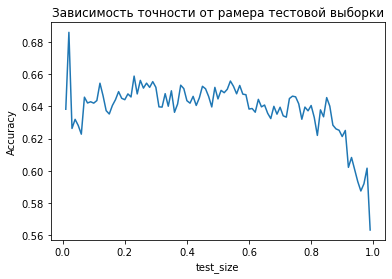

In [121]:
sns.lineplot(x = df_score['test_size'], y=df_score['Accuracy'])
plt.title('Зависимость точности от рамера тестовой выборки')
plt.show()

In [123]:
cm=confusion_matrix(target_test, pred)
cm

array([[3645, 1964],
       [2083, 1571]], dtype=int64)

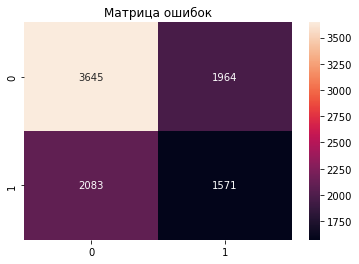

In [128]:
sns.heatmap(cm,annot=True, fmt='d')
plt.title('Матрица ошибок')
plt.show()